<a href="https://colab.research.google.com/github/anomaitech/GSL-basin/blob/main/figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

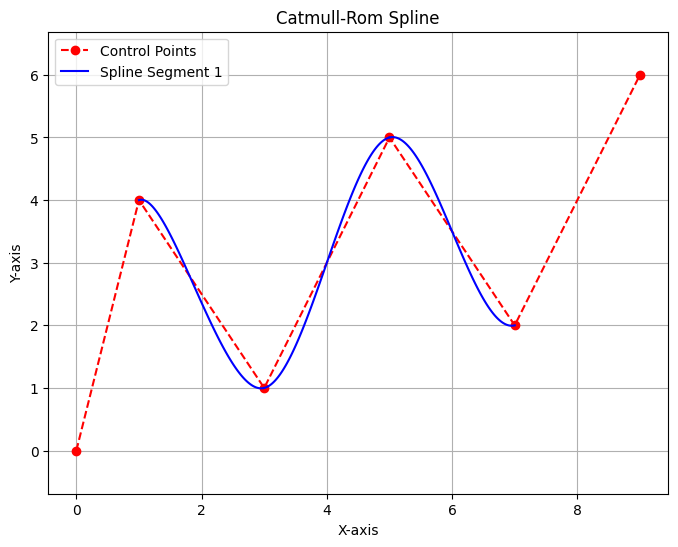

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def catmull_rom_spline(P0, P1, P2, P3, num_points=100):
    """
    Calculates points on a Catmull-Rom spline segment.

    Args:
        P0, P1, P2, P3: Control points (numpy arrays or lists of 2 elements).
        num_points: Number of points to generate for the curve segment.

    Returns:
        Tuple of (x_coords, y_coords) for the spline segment.
    """
    P0, P1, P2, P3 = map(np.array, [P0, P1, P2, P3])
    t = np.linspace(0, 1, num_points)

    # Catmull-Rom formula
    curve_points = 0.5 * (
        (2 * P1) +
        (-P0 + P2) * t[:, np.newaxis] +
        (2 * P0 - 5 * P1 + 4 * P2 - P3) * t[:, np.newaxis]**2 +
        (-P0 + 3 * P1 - 3 * P2 + P3) * t[:, np.newaxis]**3
    )
    return curve_points[:, 0], curve_points[:, 1]

def plot_catmull_rom(control_points, num_segments=100):
    """
    Plots a Catmull-Rom spline through a series of control points.

    Args:
        control_points: List of (x,y) tuples or numpy arrays representing control points.
        num_segments: Number of points to generate for each spline segment.
    """
    plt.figure(figsize=(8, 6))
    plt.plot([p[0] for p in control_points], [p[1] for p in control_points], 'ro--', label='Control Points')

    for i in range(len(control_points) - 3):
        P0, P1, P2, P3 = control_points[i:i+4]
        x_curve, y_curve = catmull_rom_spline(P0, P1, P2, P3, num_segments)
        plt.plot(x_curve, y_curve, 'b-', label=f'Spline Segment {i+1}' if i == 0 else "")

    plt.title('Catmull-Rom Spline')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

if __name__ == '__main__':
    # Example usage
    control_points = [
        (0, 0),
        (1, 4),
        (3, 1),
        (5, 5),
        (7, 2),
        (9, 6)
    ]
    plot_catmull_rom(control_points)

In [3]:
import pandas as pd

file_path = '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx'
sheet_name = 'Grace'

try:
    # Read the Excel file, skipping the first row and using the second row as header
    df_grace = pd.read_excel(file_path, sheet_name=sheet_name, header=1)
    print(f"Successfully loaded '{sheet_name}' sheet from '{file_path}' with the first row as header.")
    display(df_grace.head())
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded 'Grace' sheet from '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx' with the first row as header.


,Years,TWSa,Grace GLDAS 2.1,Grace GWSa,In-Situ GWSa,Change in volume (km3),Annual Loss/Gain,Reference,Change in volume (km3).1,Negative change
0,2002.0,-4.334670,-4.482902,0.148232,-0.459278,0.137856,NaN,0.0,0.137856,0.000000
1,2003.0,-4.065110,-3.972311,-0.092799,-3.484469,-0.086303,-0.224159,0.0,0.000000,-0.086303
2,2004.0,-3.532083,-1.548833,-1.983250,-2.635314,-1.844423,-1.758119,0.0,0.000000,-1.844423
3,2005.0,0.995167,4.469833,-3.474667,2.101157,-3.231440,-1.387018,0.0,0.000000,-3.231440
4,2006.0,3.371500,2.186417,1.185083,2.449286,1.102127,4.333568,0.0,1.102127,0.000000


Creating GRACE GWSa chart for Years vs Grace GWSa...


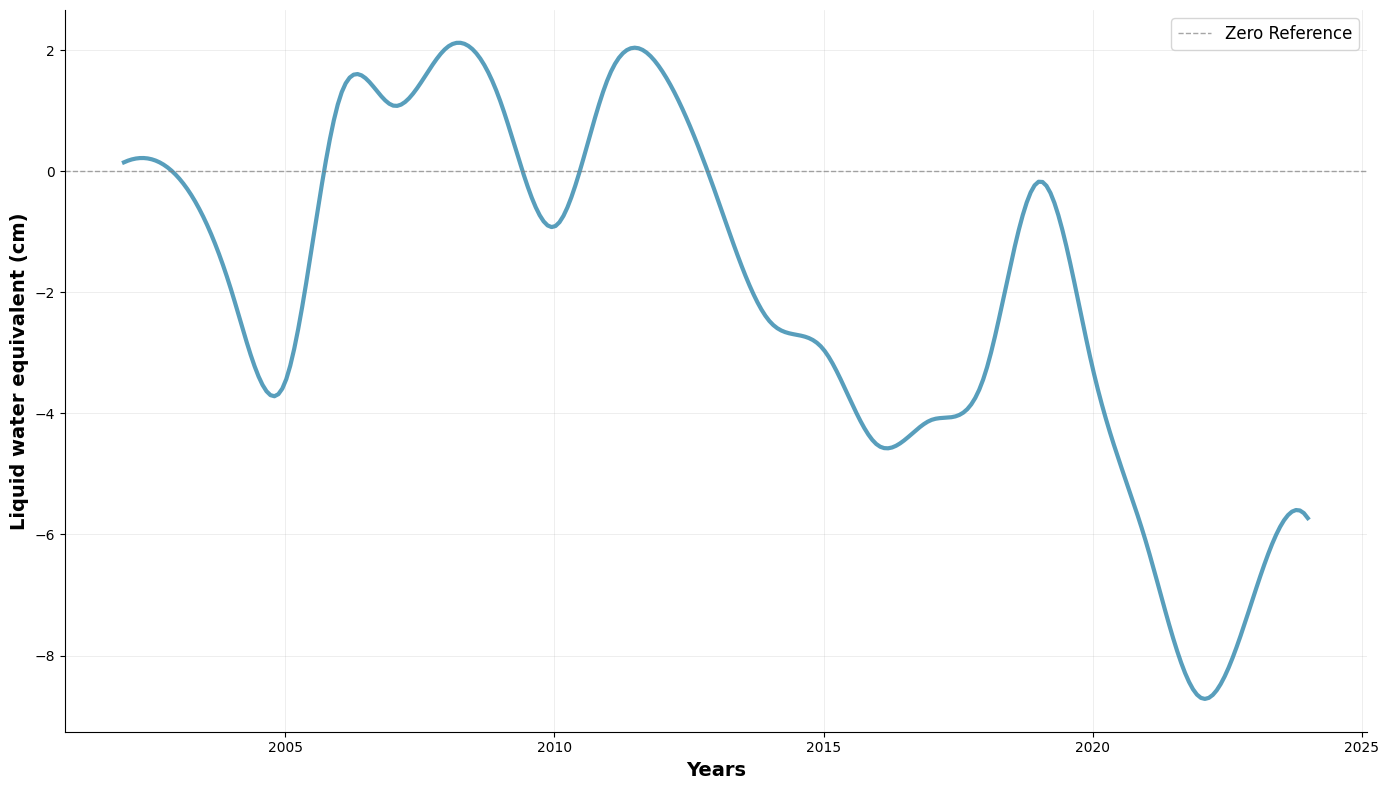


DATA SUMMARY
Total data points: 23
Years: 2002.0 - 2024.0
Grace GWSa Statistics:
  Mean: -2.018
  Std Dev: 3.057
  Min: -8.693
  Max: 2.044


In [12]:

from scipy.interpolate import make_interp_spline

def create_grace_gwsa_chart(df):
    """
    Create a simple beautiful line chart with spline interpolation for Years vs Grace GWSa
    """
    # Set style
    plt.style.use('default')

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data - remove rows with missing values in Years or Grace GWSa
    clean_df = df[['Years', 'Grace GWSa']].dropna()

    # Convert to numeric
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df['Grace GWSa'] = pd.to_numeric(clean_df['Grace GWSa'], errors='coerce')
    clean_df = clean_df.dropna()

    # Sort by years to ensure proper plotting
    clean_df = clean_df.sort_values('Years')

    # print(f"Plotting {len(clean_df)} data points")
    # print(f"Year range: {clean_df['Years'].min()} - {clean_df['Years'].max()}")
    # print(f"GWSa range: {clean_df['Grace GWSa'].min():.2f} - {clean_df['Grace GWSa'].max():.2f}")

    # Extract data
    years = clean_df['Years'].values
    gwsa = clean_df['Grace GWSa'].values

    # Create spline interpolation for smooth curve
    if len(years) >= 3:  # Need at least 3 points for spline
        # Create finer x values for smooth curve
        years_smooth = np.linspace(years.min(), years.max(), 300)

        # Create spline
        spline = make_interp_spline(years, gwsa, k=3)
        gwsa_smooth = spline(years_smooth)

        # Plot smooth line
        ax.plot(years_smooth, gwsa_smooth,
                linewidth=3,
                color='#2E86AB',
                alpha=0.8,
                )

    # Plot original data points
    # ax.scatter(years, gwsa,
    #            color='#A23B72',
    #            s=80,
    #            alpha=0.8,
    #            edgecolor='white',
    #            linewidth=2,
    #            zorder=5,
    #            label='Data Points')

    # Add zero reference line
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=1, label='Zero Reference')

    # Customize the chart
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')

    # Add legend
    ax.legend(fontsize=12, loc='best')

    # Add grid
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

    # Remove top and right spines
    ax.spines[['top', 'right']].set_visible(False)

    # Add statistics as text

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df

# Execute the plotting
print("Creating GRACE GWSa chart for Years vs Grace GWSa...")

# Check if the required columns exist
if 'Years' in df_grace.columns and 'Grace GWSa' in df_grace.columns:
    fig, ax, clean_data = create_grace_gwsa_chart(df_grace)

    # Display data summary
    print(f"\n{'='*50}")
    print("DATA SUMMARY")
    print(f"{'='*50}")
    print(f"Total data points: {len(clean_data)}")
    print(f"Years: {clean_data['Years'].min()} - {clean_data['Years'].max()}")
    print(f"Grace GWSa Statistics:")
    print(f"  Mean: {clean_data['Grace GWSa'].mean():.3f}")
    print(f"  Std Dev: {clean_data['Grace GWSa'].std():.3f}")
    print(f"  Min: {clean_data['Grace GWSa'].min():.3f}")
    print(f"  Max: {clean_data['Grace GWSa'].max():.3f}")

else:
    print("Error: Required columns 'Years' and 'Grace GWSa' not found in the dataset.")
    print("Available columns:", df_grace.columns.tolist())

Creating Change in Volume chart for Years vs Change in volume (km3)...


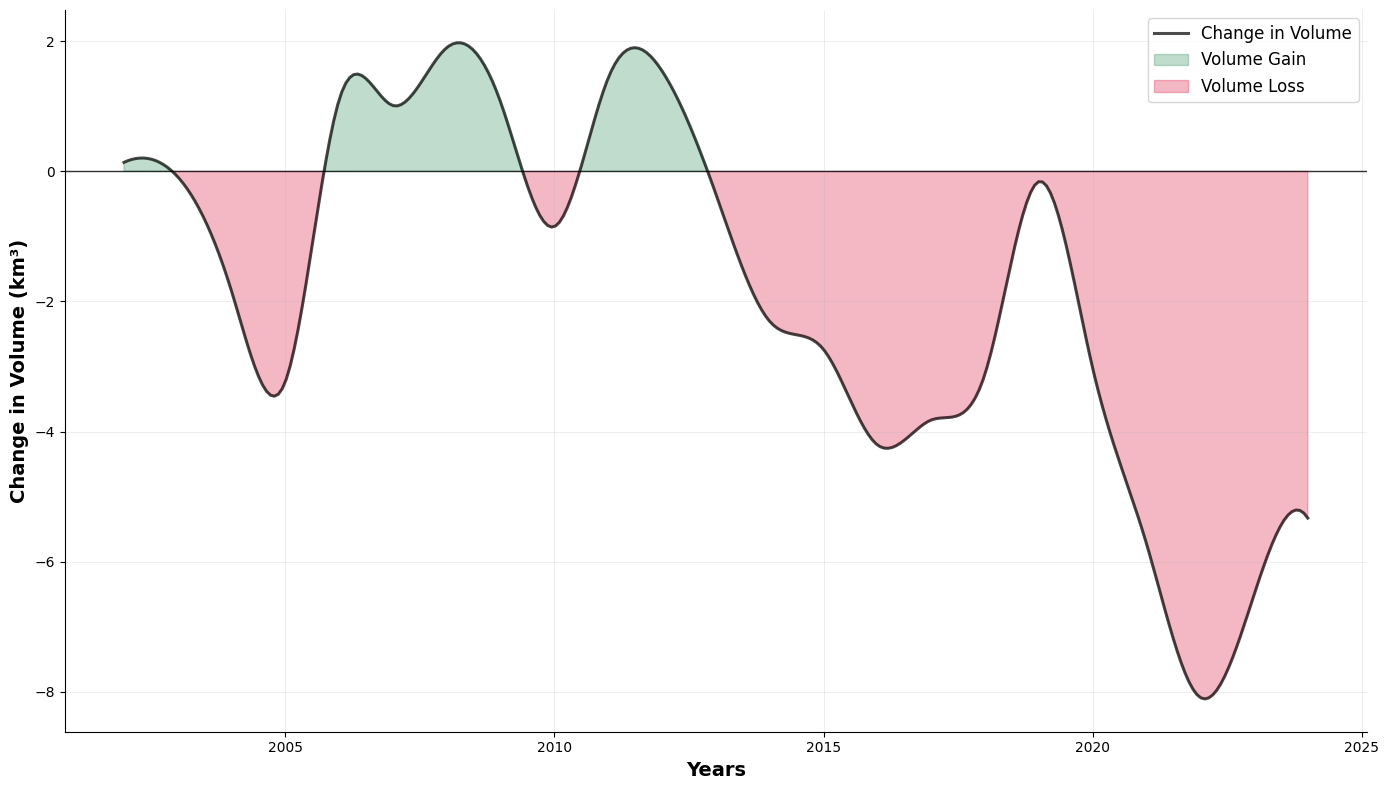


DATA SUMMARY - Change in Volume
Total data points: 23
Years: 2002.0 - 2024.0
Volume Change Statistics:
  Mean: -1.877 km³
  Std Dev: 2.843 km³
  Min: -8.084 km³
  Max: 1.901 km³
  Positive periods: 7
  Negative periods: 16


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def create_volume_comparison_chart(df):
    """
    Create a smooth line chart for Change in Volume (km³) vs Years
    with continuous line and filled colors above/below zero.
    """
    plt.style.use('default')

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data
    clean_df = df[['Years', 'Change in volume (km3)']].dropna()
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df['Change in volume (km3)'] = pd.to_numeric(clean_df['Change in volume (km3)'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    years = clean_df['Years'].values
    volume = clean_df['Change in volume (km3)'].values

    # Smooth curve
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 300)
        spline = make_interp_spline(years, volume, k=3)
        volume_smooth = spline(years_smooth)
    else:
        years_smooth, volume_smooth = years, volume

    # Plot the continuous black line
    ax.plot(years_smooth, volume_smooth, color='black', linewidth=2.2, alpha=0.7, label='Change in Volume')

    # Fill regions above and below zero
    ax.fill_between(years_smooth, volume_smooth, 0, where=volume_smooth >= 0,
                    interpolate=True, color='#2E8B57', alpha=0.3, label='Volume Gain')
    ax.fill_between(years_smooth, volume_smooth, 0, where=volume_smooth < 0,
                    interpolate=True, color='#DC143C', alpha=0.3, label='Volume Loss')

    # Zero reference line
    ax.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.8)

    # Labels & Title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Change in Volume (km³)', fontsize=14, fontweight='bold')


    # Grid and legend
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.legend(fontsize=12, loc='best')

    # Remove extra spines
    ax.spines[['top', 'right']].set_visible(False)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === EXECUTION ===
print("Creating Change in Volume chart for Years vs Change in volume (km3)...")

if 'Years' in df_grace.columns and 'Change in volume (km3)' in df_grace.columns:
    fig, ax, clean_data = create_volume_comparison_chart(df_grace)

    print(f"\n{'='*50}")
    print("DATA SUMMARY - Change in Volume")
    print(f"{'='*50}")
    print(f"Total data points: {len(clean_data)}")
    print(f"Years: {clean_data['Years'].min()} - {clean_data['Years'].max()}")
    print(f"Volume Change Statistics:")
    print(f"  Mean: {clean_data['Change in volume (km3)'].mean():.3f} km³")
    print(f"  Std Dev: {clean_data['Change in volume (km3)'].std():.3f} km³")
    print(f"  Min: {clean_data['Change in volume (km3)'].min():.3f} km³")
    print(f"  Max: {clean_data['Change in volume (km3)'].max():.3f} km³")

    positive_count = (clean_data['Change in volume (km3)'] >= 0).sum()
    negative_count = (clean_data['Change in volume (km3)'] < 0).sum()
    print(f"  Positive periods: {positive_count}")
    print(f"  Negative periods: {negative_count}")
else:
    print("Error: Required columns 'Years' and 'Change in volume (km3)' not found in the dataset.")
    print("Available columns:", df_grace.columns.tolist())


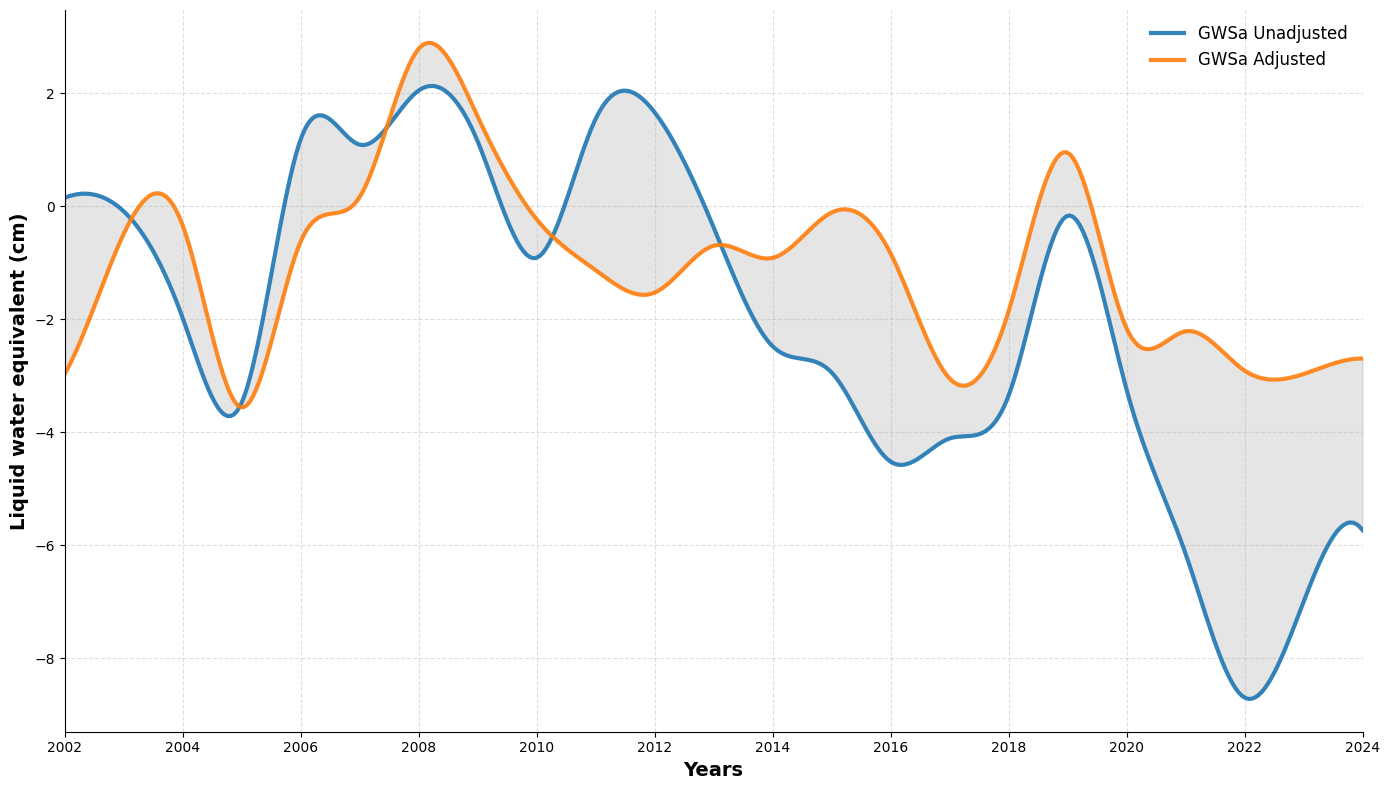

In [23]:

# Load data
grace_adjusted = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='Grace Adjusted'
)


def plot_gwsa_comparison(df):
    """Plot GWSa Unadjusted and Adjusted vs Years with smooth spline curves (x-axis every 2 years)."""
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean & sort
    clean_df = df[['Years', 'GWSa Unadjusted', 'GWSa Adjusted']].dropna()
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df['GWSa Unadjusted'] = pd.to_numeric(clean_df['GWSa Unadjusted'], errors='coerce')
    clean_df['GWSa Adjusted'] = pd.to_numeric(clean_df['GWSa Adjusted'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    years = clean_df['Years'].values
    unadj = clean_df['GWSa Unadjusted'].values
    adj = clean_df['GWSa Adjusted'].values

    # Smooth spline interpolation
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_unadj = make_interp_spline(years, unadj, k=3)
        spline_adj = make_interp_spline(years, adj, k=3)
        unadj_smooth = spline_unadj(years_smooth)
        adj_smooth = spline_adj(years_smooth)
    else:
        years_smooth, unadj_smooth, adj_smooth = years, unadj, adj

    # Plot lines
    ax.plot(years_smooth, unadj_smooth, color='#1f77b4', linewidth=3,
            label='GWSa Unadjusted', alpha=0.9)
    ax.plot(years_smooth, adj_smooth, color='#ff7f0e', linewidth=3,
            label='GWSa Adjusted', alpha=0.9)

    # Fill between
    ax.fill_between(years_smooth, unadj_smooth, adj_smooth,
                    color='gray', alpha=0.2)

    # Styling
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')

    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # 🔹 Set x-axis ticks every 2 years
    start_year = int(np.floor(clean_df['Years'].min()))
    end_year = int(np.ceil(clean_df['Years'].max()))
    ax.set_xticks(np.arange(start_year, end_year + 1, 2))
    ax.set_xlim(start_year, end_year)

    # Optional: make year labels horizontal
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()
    return fig, ax, clean_df

# Run
fig, ax, clean_df = plot_gwsa_comparison(grace_adjusted)


In [24]:
adjusted_vs_GWDM = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='Adjusted vs GWDM'
)

In [25]:
adjusted_vs_GWDM

,Years,Unfactored Adjusted GRACE GWSa,Factored Adjusted GRACE GWSa,In-Situ GWSa,Unnamed: 4
0,2002.0,-2.966212,-6.910132,-2.287534,NaN
1,2003.0,-0.488632,-4.503098,-5.116082,NaN
2,2004.0,-0.344083,-4.081619,-4.103820,NaN
3,2005.0,-3.559667,-2.554525,2.162194,NaN
4,2006.0,-0.624083,2.973772,3.208314,NaN
5,2007.0,0.161833,-1.148232,0.357358,NaN
6,2008.0,2.784250,3.193334,-1.067487,NaN
7,2009.0,1.582750,1.617770,-0.556558,NaN
8,2010.0,-0.233500,-1.401488,-1.511711,NaN
9,2011.0,-1.133624,3.693729,3.373998,NaN


    Years  Unfactored Adjusted GRACE GWSa  Factored Adjusted GRACE GWSa  \
0  2002.0                       -2.966212                     -6.910132   
1  2003.0                       -0.488632                     -4.503098   
2  2004.0                       -0.344083                     -4.081619   
3  2005.0                       -3.559667                     -2.554525   
4  2006.0                       -0.624083                      2.973772   

   In-Situ GWSa  Unnamed: 4  
0     -2.287534         NaN  
1     -5.116082         NaN  
2     -4.103820         NaN  
3      2.162194         NaN  
4      3.208314         NaN  


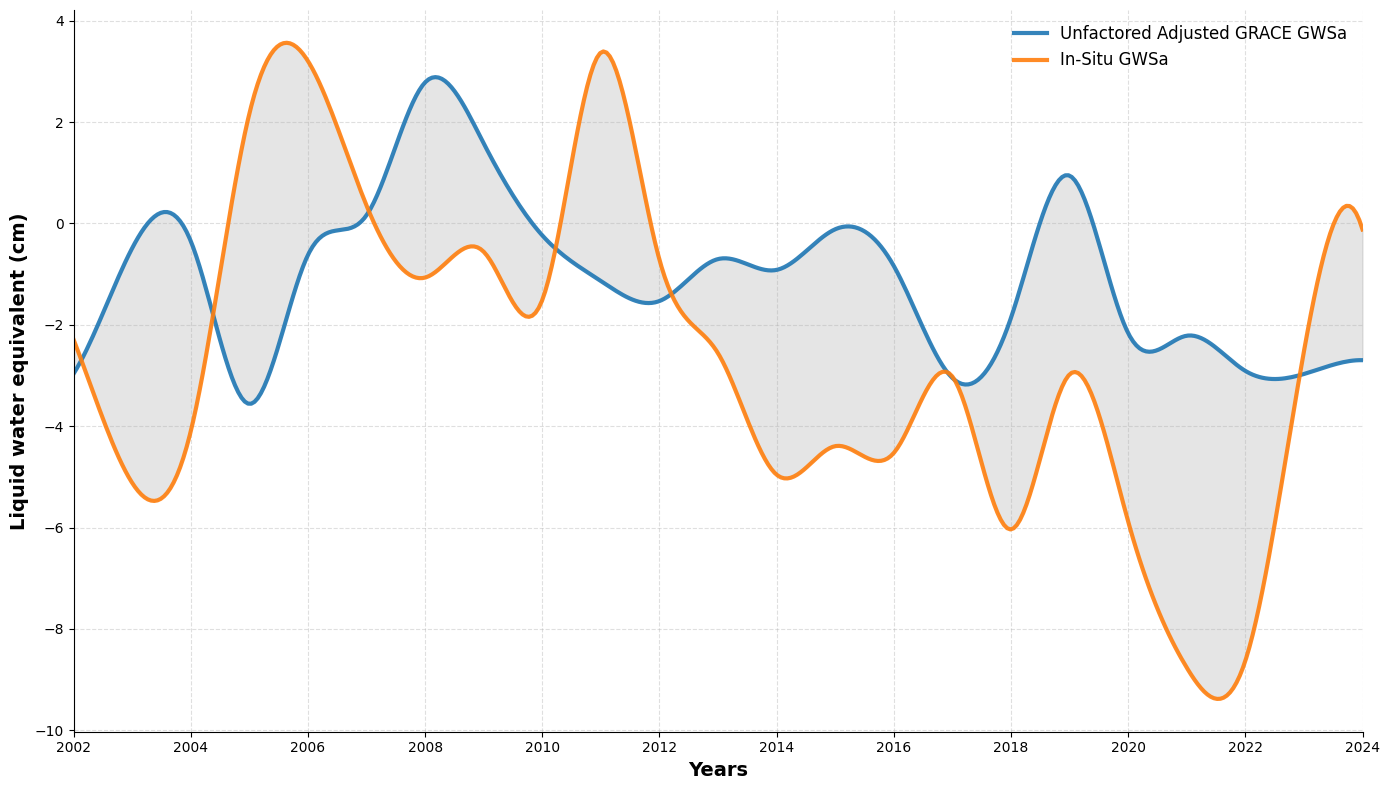

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# === Load the data ===
adjusted_vs_GWDM = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='Adjusted vs GWDM'
)

print(adjusted_vs_GWDM.head())

# === Plot function ===
def plot_factored_vs_unfactored(df):
    """
    Plot Years vs Factored and Unfactored Adjusted GRACE GWSa with smoothing spline,
    removing NaN values and showing ticks every 2 years.
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data and remove NaNs
    cols = ['Years', 'Unfactored Adjusted GRACE GWSa', 'In-Situ GWSa']
    clean_df = df[cols].dropna(subset=['Years'])
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df = clean_df.dropna(subset=['Years'])
    clean_df['Unfactored Adjusted GRACE GWSa'] = pd.to_numeric(clean_df['Unfactored Adjusted GRACE GWSa'], errors='coerce')
    clean_df['In-Situ GWSa'] = pd.to_numeric(clean_df['In-Situ GWSa'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    # Extract data
    years = clean_df['Years'].values
    unfactored = clean_df['Unfactored Adjusted GRACE GWSa'].values
    factored = clean_df['In-Situ GWSa'].values

    # Spline smoothing
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_unfact = make_interp_spline(years, unfactored, k=3)
        spline_fact = make_interp_spline(years, factored, k=3)
        unfact_smooth = spline_unfact(years_smooth)
        fact_smooth = spline_fact(years_smooth)
    else:
        years_smooth, unfact_smooth, fact_smooth = years, unfactored, factored

    # Plot both smooth lines
    ax.plot(years_smooth, unfact_smooth, color='#1f77b4', linewidth=3,
            label='Unfactored Adjusted GRACE GWSa', alpha=0.9)
    ax.plot(years_smooth, fact_smooth, color='#ff7f0e', linewidth=3,
            label='In-Situ GWSa', alpha=0.9)

    # Fill subtle difference region
    ax.fill_between(years_smooth, unfact_smooth, fact_smooth, color='gray', alpha=0.2)

    # Axis labels & title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')


    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # Set x-axis ticks every 2 years
    start_year = int(np.floor(clean_df['Years'].min()))
    end_year = int(np.ceil(clean_df['Years'].max()))
    ax.set_xticks(np.arange(start_year, end_year + 1, 2))
    ax.set_xlim(start_year, end_year)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === Execute ===

fig, ax, clean_df = plot_factored_vs_unfactored(adjusted_vs_GWDM)


    Years  Unfactored Adjusted GRACE GWSa  Factored Adjusted GRACE GWSa  \
0  2002.0                       -2.966212                     -6.910132   
1  2003.0                       -0.488632                     -4.503098   
2  2004.0                       -0.344083                     -4.081619   
3  2005.0                       -3.559667                     -2.554525   
4  2006.0                       -0.624083                      2.973772   

   In-Situ GWSa  Unnamed: 4  
0     -2.287534         NaN  
1     -5.116082         NaN  
2     -4.103820         NaN  
3      2.162194         NaN  
4      3.208314         NaN  


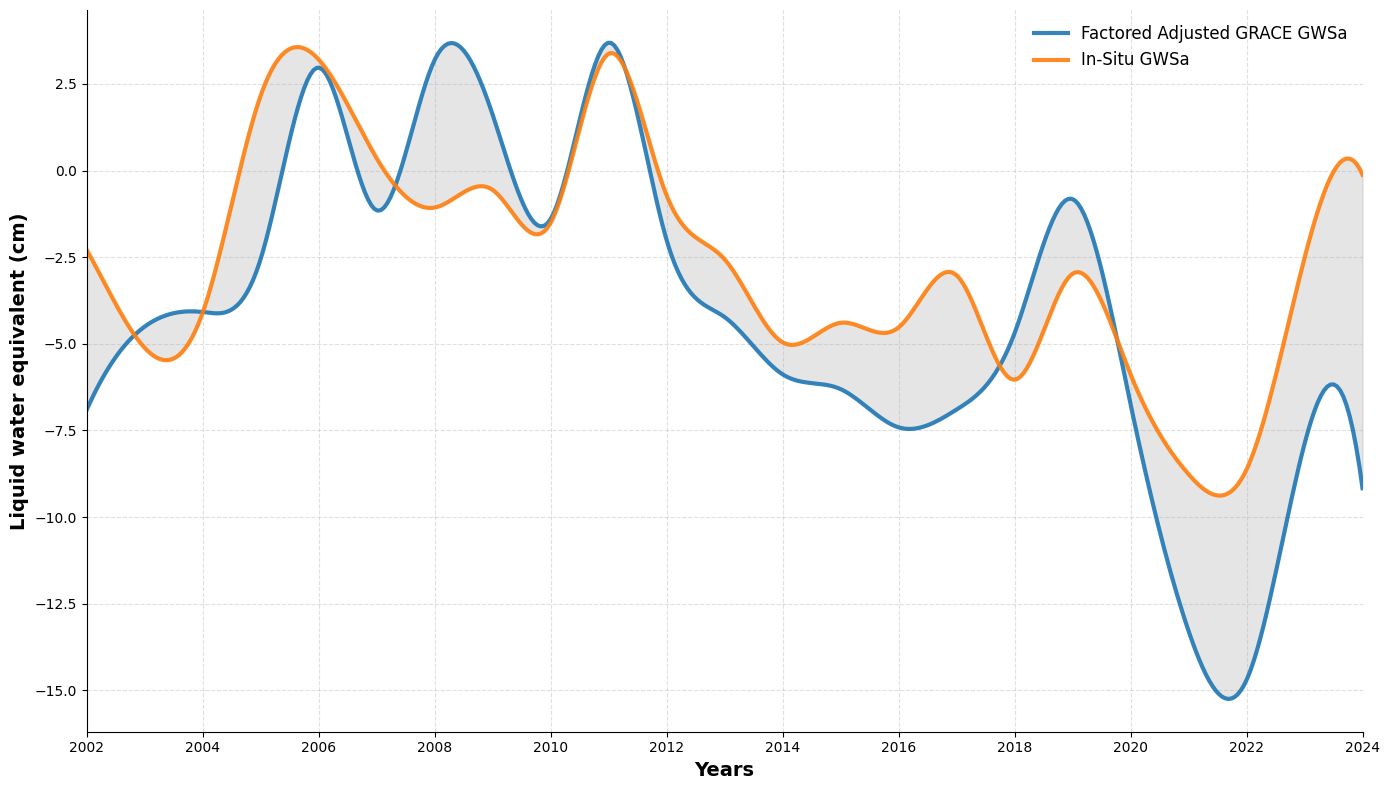

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# === Load the data ===
adjusted_vs_GWDM = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='Adjusted vs GWDM'
)

print(adjusted_vs_GWDM.head())

# === Plot function ===
def plot_factored_vs_unfactored(df):
    """
    Plot Years vs Factored and Unfactored Adjusted GRACE GWSa with smoothing spline,
    removing NaN values and showing ticks every 2 years.
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data and remove NaNs
    cols = ['Years', 'Factored Adjusted GRACE GWSa', 'In-Situ GWSa']
    clean_df = df[cols].dropna(subset=['Years'])
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df = clean_df.dropna(subset=['Years'])
    clean_df['Factored Adjusted GRACE GWSa'] = pd.to_numeric(clean_df['Factored Adjusted GRACE GWSa'], errors='coerce')
    clean_df['In-Situ GWSa'] = pd.to_numeric(clean_df['In-Situ GWSa'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    # Extract data
    years = clean_df['Years'].values
    unfactored = clean_df['Factored Adjusted GRACE GWSa'].values
    factored = clean_df['In-Situ GWSa'].values

    # Spline smoothing
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_unfact = make_interp_spline(years, unfactored, k=3)
        spline_fact = make_interp_spline(years, factored, k=3)
        unfact_smooth = spline_unfact(years_smooth)
        fact_smooth = spline_fact(years_smooth)
    else:
        years_smooth, unfact_smooth, fact_smooth = years, unfactored, factored

    # Plot both smooth lines
    ax.plot(years_smooth, unfact_smooth, color='#1f77b4', linewidth=3,
            label='Factored Adjusted GRACE GWSa', alpha=0.9)
    ax.plot(years_smooth, fact_smooth, color='#ff7f0e', linewidth=3,
            label='In-Situ GWSa', alpha=0.9)

    # Fill subtle difference region
    ax.fill_between(years_smooth, unfact_smooth, fact_smooth, color='gray', alpha=0.2)

    # Axis labels & title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')


    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # Set x-axis ticks every 2 years
    start_year = int(np.floor(clean_df['Years'].min()))
    end_year = int(np.ceil(clean_df['Years'].max()))
    ax.set_xticks(np.arange(start_year, end_year + 1, 2))
    ax.set_xlim(start_year, end_year)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === Execute ===

fig, ax, clean_df = plot_factored_vs_unfactored(adjusted_vs_GWDM)


In [32]:
gldas = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='GLDAS 2.2'
)

In [33]:
gldas

,Years,GLDAS 2.2 CLSM GWSa,SWSa,Unadjusted GRACE-based GWSa,GLDAS2.2- Unadjusted GRACE-based GWSa,adjusted GRACE-based GWSa,factored adjusted GRACE-Based GWSa,GWDM GWSa,Unnamed: 8
0,2003.0,-3.046573,0.395833,-3.442406,0.395833,-0.488632,-4.553743,-3.484469,NaN
1,2004.0,-0.880637,-1.639167,0.758530,1.639167,-0.344083,-3.876167,-2.635314,NaN
2,2005.0,2.547599,0.085000,2.462599,0.085000,-3.559667,-2.564500,2.101157,NaN
3,2006.0,2.832601,1.809167,1.023434,1.809167,-0.624083,2.747417,2.449286,NaN
4,2007.0,-0.755105,0.924167,-1.679272,0.924167,0.161833,-1.264667,-0.420590,NaN
5,2008.0,-0.716680,-0.740000,0.023320,0.740000,2.784250,3.287167,-1.429311,NaN
6,2009.0,0.374715,-0.440000,0.814715,0.440000,1.582750,1.672083,-0.065227,NaN
7,2010.0,0.258167,-0.680000,0.938167,0.680000,-0.233500,-1.315333,-1.692442,NaN
8,2011.0,4.277524,2.677500,1.600024,2.677500,-1.133624,3.357519,3.715057,NaN
9,2012.0,-0.425624,3.188333,-3.613957,3.188333,-1.530186,-2.403901,-0.797816,-0.372192


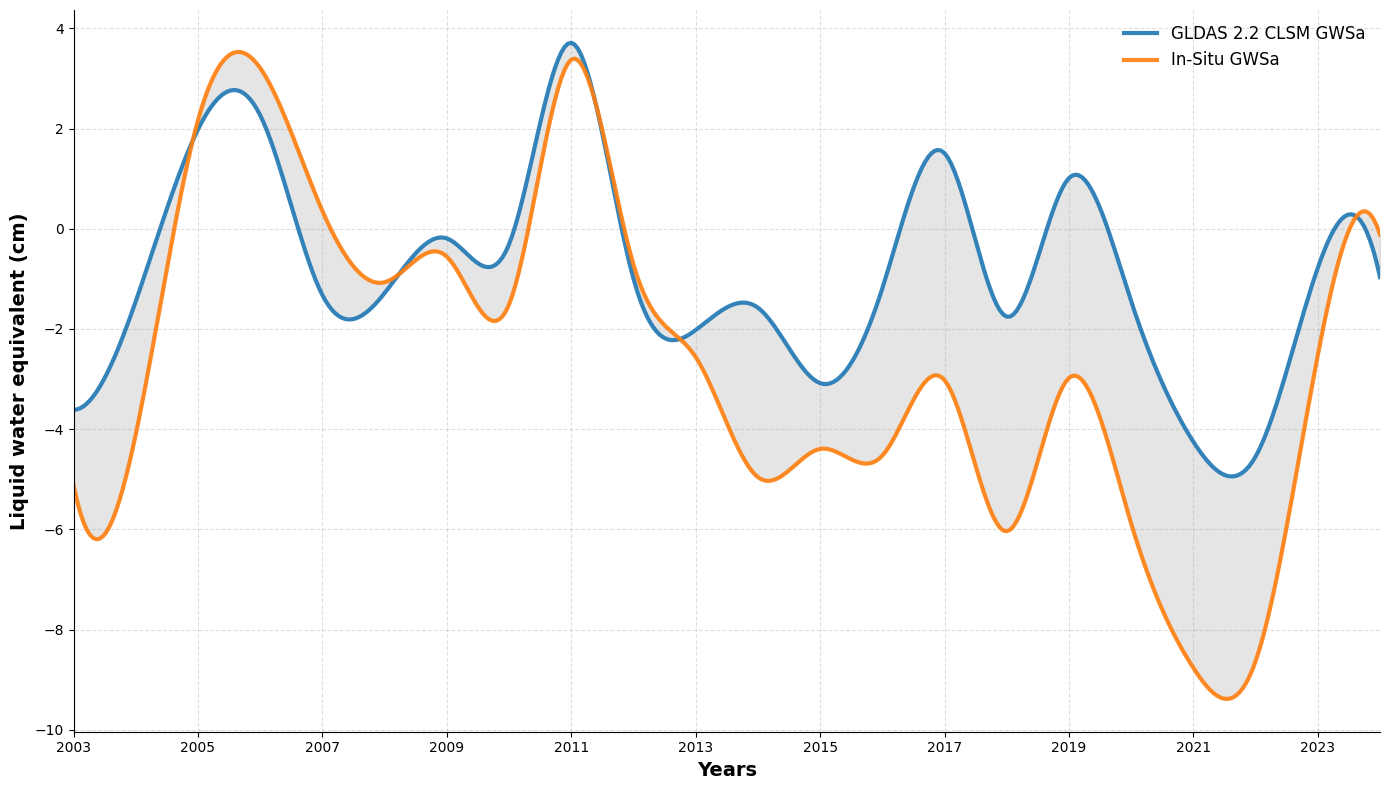

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# === Load the data ===
gldas = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='GLDAS 2.2'
)



# === Plot function ===
def plot_factored_vs_unfactored(df):
    """
    Plot Years vs Factored and Unfactored Adjusted GRACE GWSa with smoothing spline,
    removing NaN values and showing ticks every 2 years.
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data and remove NaNs
    cols = ['Years', 'GLDAS 2.2 CLSM GWSa', 'GWDM GWSa']
    clean_df = df[cols].dropna(subset=['Years'])
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df = clean_df.dropna(subset=['Years'])
    clean_df['GLDAS 2.2 CLSM GWSa'] = pd.to_numeric(clean_df['GLDAS 2.2 CLSM GWSa'], errors='coerce')
    clean_df['GWDM GWSa'] = pd.to_numeric(clean_df['GWDM GWSa'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    # Extract data
    years = clean_df['Years'].values
    unfactored = clean_df['GLDAS 2.2 CLSM GWSa'].values
    factored = clean_df['GWDM GWSa'].values

    # Spline smoothing
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_unfact = make_interp_spline(years, unfactored, k=3)
        spline_fact = make_interp_spline(years, factored, k=3)
        unfact_smooth = spline_unfact(years_smooth)
        fact_smooth = spline_fact(years_smooth)
    else:
        years_smooth, unfact_smooth, fact_smooth = years, unfactored, factored

    # Plot both smooth lines
    ax.plot(years_smooth, unfact_smooth, color='#1f77b4', linewidth=3,
            label='GLDAS 2.2 CLSM GWSa', alpha=0.9)
    ax.plot(years_smooth, fact_smooth, color='#ff7f0e', linewidth=3,
            label='In-Situ GWSa', alpha=0.9)

    # Fill subtle difference region
    ax.fill_between(years_smooth, unfact_smooth, fact_smooth, color='gray', alpha=0.2)

    # Axis labels & title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')


    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # Set x-axis ticks every 2 years
    start_year = int(np.floor(clean_df['Years'].min()))
    end_year = int(np.ceil(clean_df['Years'].max()))
    ax.set_xticks(np.arange(start_year, end_year + 1, 2))
    ax.set_xlim(start_year, end_year)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === Execute ===

fig, ax, clean_df = plot_factored_vs_unfactored(gldas)


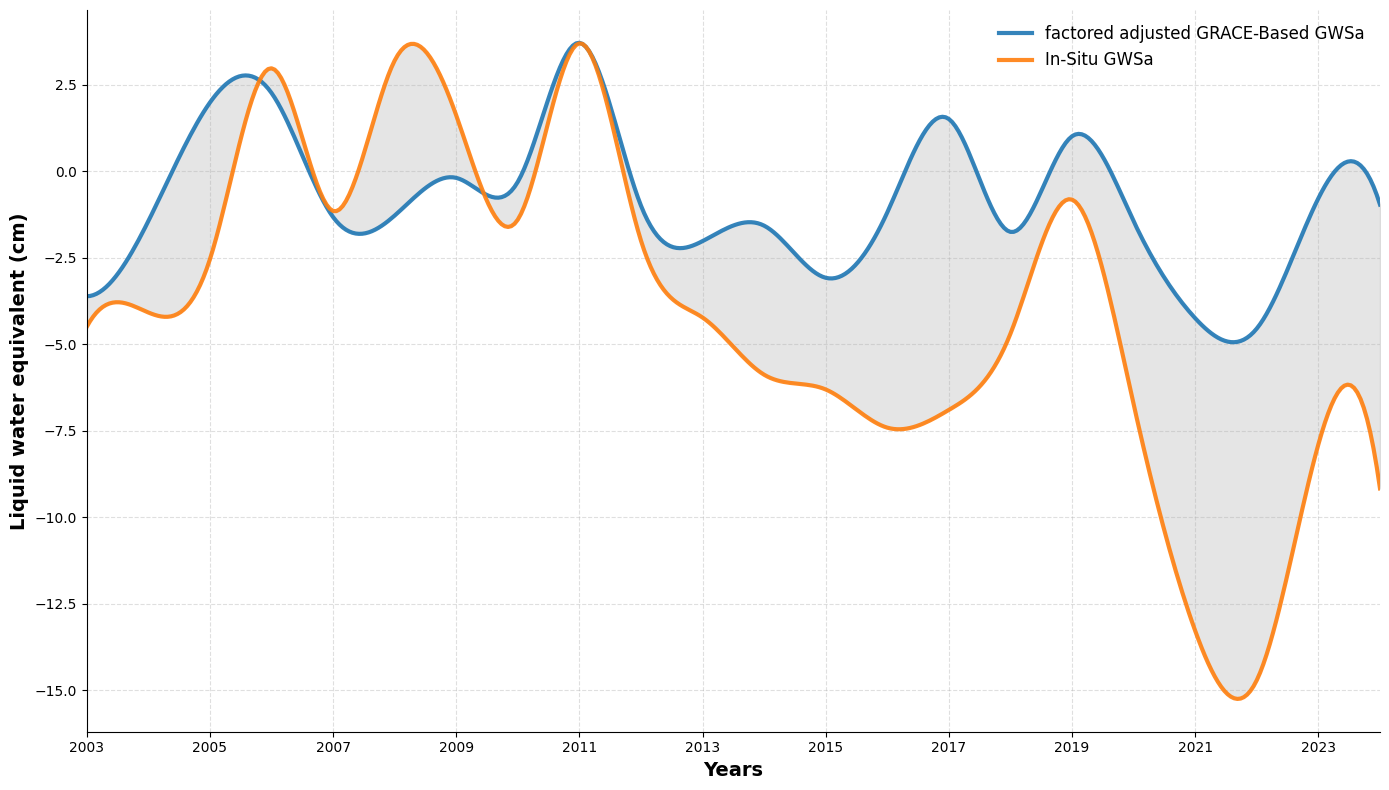

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# === Load the data ===
gldas = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='GLDAS 2.2'
)



# === Plot function ===
def plot_factored_vs_unfactored(df):
    """
    Plot Years vs Factored and Unfactored Adjusted GRACE GWSa with smoothing spline,
    removing NaN values and showing ticks every 2 years.
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data and remove NaNs
    cols = ['Years', 'GLDAS 2.2 CLSM GWSa', 'factored adjusted GRACE-Based GWSa']
    clean_df = df[cols].dropna(subset=['Years'])
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df = clean_df.dropna(subset=['Years'])
    clean_df['GLDAS 2.2 CLSM GWSa'] = pd.to_numeric(clean_df['GLDAS 2.2 CLSM GWSa'], errors='coerce')
    clean_df['GWDM GWSa'] = pd.to_numeric(clean_df['factored adjusted GRACE-Based GWSa'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    # Extract data
    years = clean_df['Years'].values
    unfactored = clean_df['GLDAS 2.2 CLSM GWSa'].values
    factored = clean_df['factored adjusted GRACE-Based GWSa'].values

    # Spline smoothing
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_unfact = make_interp_spline(years, unfactored, k=3)
        spline_fact = make_interp_spline(years, factored, k=3)
        unfact_smooth = spline_unfact(years_smooth)
        fact_smooth = spline_fact(years_smooth)
    else:
        years_smooth, unfact_smooth, fact_smooth = years, unfactored, factored

    # Plot both smooth lines
    ax.plot(years_smooth, unfact_smooth, color='#1f77b4', linewidth=3,
            label='factored adjusted GRACE-Based GWSa', alpha=0.9)
    ax.plot(years_smooth, fact_smooth, color='#ff7f0e', linewidth=3,
            label='In-Situ GWSa', alpha=0.9)

    # Fill subtle difference region
    ax.fill_between(years_smooth, unfact_smooth, fact_smooth, color='gray', alpha=0.2)

    # Axis labels & title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')


    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # Set x-axis ticks every 2 years
    start_year = int(np.floor(clean_df['Years'].min()))
    end_year = int(np.ceil(clean_df['Years'].max()))
    ax.set_xticks(np.arange(start_year, end_year + 1, 2))
    ax.set_xlim(start_year, end_year)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === Execute ===

fig, ax, clean_df = plot_factored_vs_unfactored(gldas)
